# Design Rule Document

## Device

### Function signature and return types

A Device generator **must** return a tuple `(D, P)`:

* **D**: `gf.Component`
  The fully instantiated geometry including all ports, references, labels, and metadata.
* **P**: `gf.Path | Sequence[tuple[float, float]]`
  A single centerline path describing the nominal optical axis of the device.
  Use `gf.Path` when curvature matters; for purely rectilinear sections a simple list of `(x, y)` points is sufficient.

```python
def Device(**kwargs) -> tuple[gf.Component, gf.Path | list[tuple[float, float]]]:
    ...
```

The design rule is implemented in the `/device` folder.

### Mandatory ports

A Device **must expose at least one of the following port conventions** so that the place‑and‑route engine can infer connectivity:

| Coupling style  | Required ports | Orientation convention                      |
| --------------- | -------------- | ------------------------------------------- |
| Regional (area) | `coupler`      | ignored                                     |
| Port (two sides)  | `in`, `out`    | `in` faces −x (180 °), `out` faces +x (0 °) |

### Optional ports

A Device **may expose additional auxiliary ports** so that it can seamlessly combine with other Devices to form larger assemblies.

| Purpose                         | Recommended name(s)          | Orientation convention                           |
| ------------------------------- | ---------------------------- | ------------------------------------------------ |
| Vertical stacking | `top`, `bottom`              | `top` faces +y (90 °), `bottom` faces −y (270 °) |
| Horizontal stacking | `left`, `right`              | `left` faces -x (180 °), `right` faces +x (0 °) |
| Other stacking approachs | ...              | ...|

**Guidelines**

* Use lowercase snake‑case for names and keep them semantically meaningful.
* Optional ports **must not collide** with mandatory names (`in`, `out`, `coupler`). If both sets are required, embed the core Device inside a composite wrapper Component.

### Example: Regional coupling device I

┏━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name    ┃ width ┃ orientation ┃ layer         ┃ center                      ┃ port_type ┃
┡━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (-25.26943802925325, 170.5) │ optical   │
└─────────┴───────┴─────────────┴───────────────┴─────────────────────────────┴───────────┘

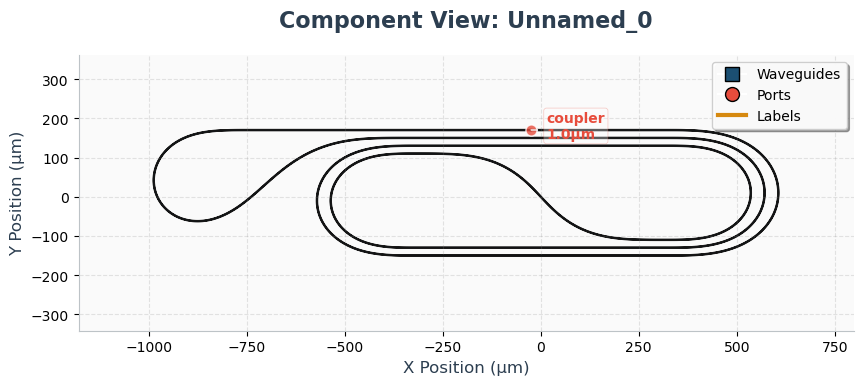

In [1]:
from gdslayout.structure import Structure
from gdslayout.visualization import plot_component

structure = Structure(config_path="./config_example/7.yaml")
device, device_path = structure._load_device()
device.pprint_ports()
fig, ax = plot_component(device, with_ports=True, with_labels=True, figsize=(10, 8))

### Example: Regional coupling device II

┏━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name    ┃ width ┃ orientation ┃ layer         ┃ center         ┃ port_type ┃
┡━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ bottom  │ 1.0   │ 270.0       │ SLAB150 (2/0) │ (0.0, -52.033) │ optical   │
│ coupler │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 0.0)     │ optical   │
└─────────┴───────┴─────────────┴───────────────┴────────────────┴───────────┘

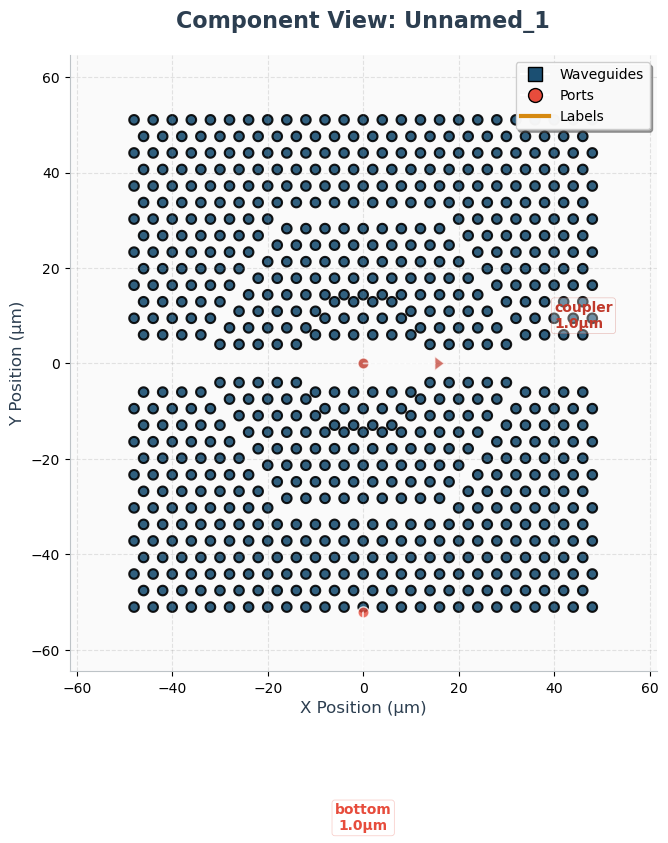

In [2]:
from gdslayout.structure import Structure
from gdslayout.visualization import plot_component

structure = Structure(config_path="./config_example/8.yaml")
device, device_path = structure._load_device()
device.pprint_ports()
fig, ax = plot_component(device, with_ports=True, with_labels=True, figsize=(10, 8))

### Example: Port coupling device

✅ Connected top -> bottom


┏━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name    ┃ width ┃ orientation ┃ layer         ┃ center                      ┃ port_type ┃
┡━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ bottom  │ 1.0   │ 270.0       │ SLAB150 (2/0) │ (0.0, -4.28)                │ optical   │
│ in      │ 1.0   │ 180.0       │ SLAB150 (2/0) │ (-10.0, 1.8121342951089923) │ optical   │
│ out     │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (10.0, 1.8121342951089923)  │ optical   │
│ coupler │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 1.8121342951089923)   │ optical   │
└─────────┴───────┴─────────────┴───────────────┴─────────────────────────────┴───────────┘

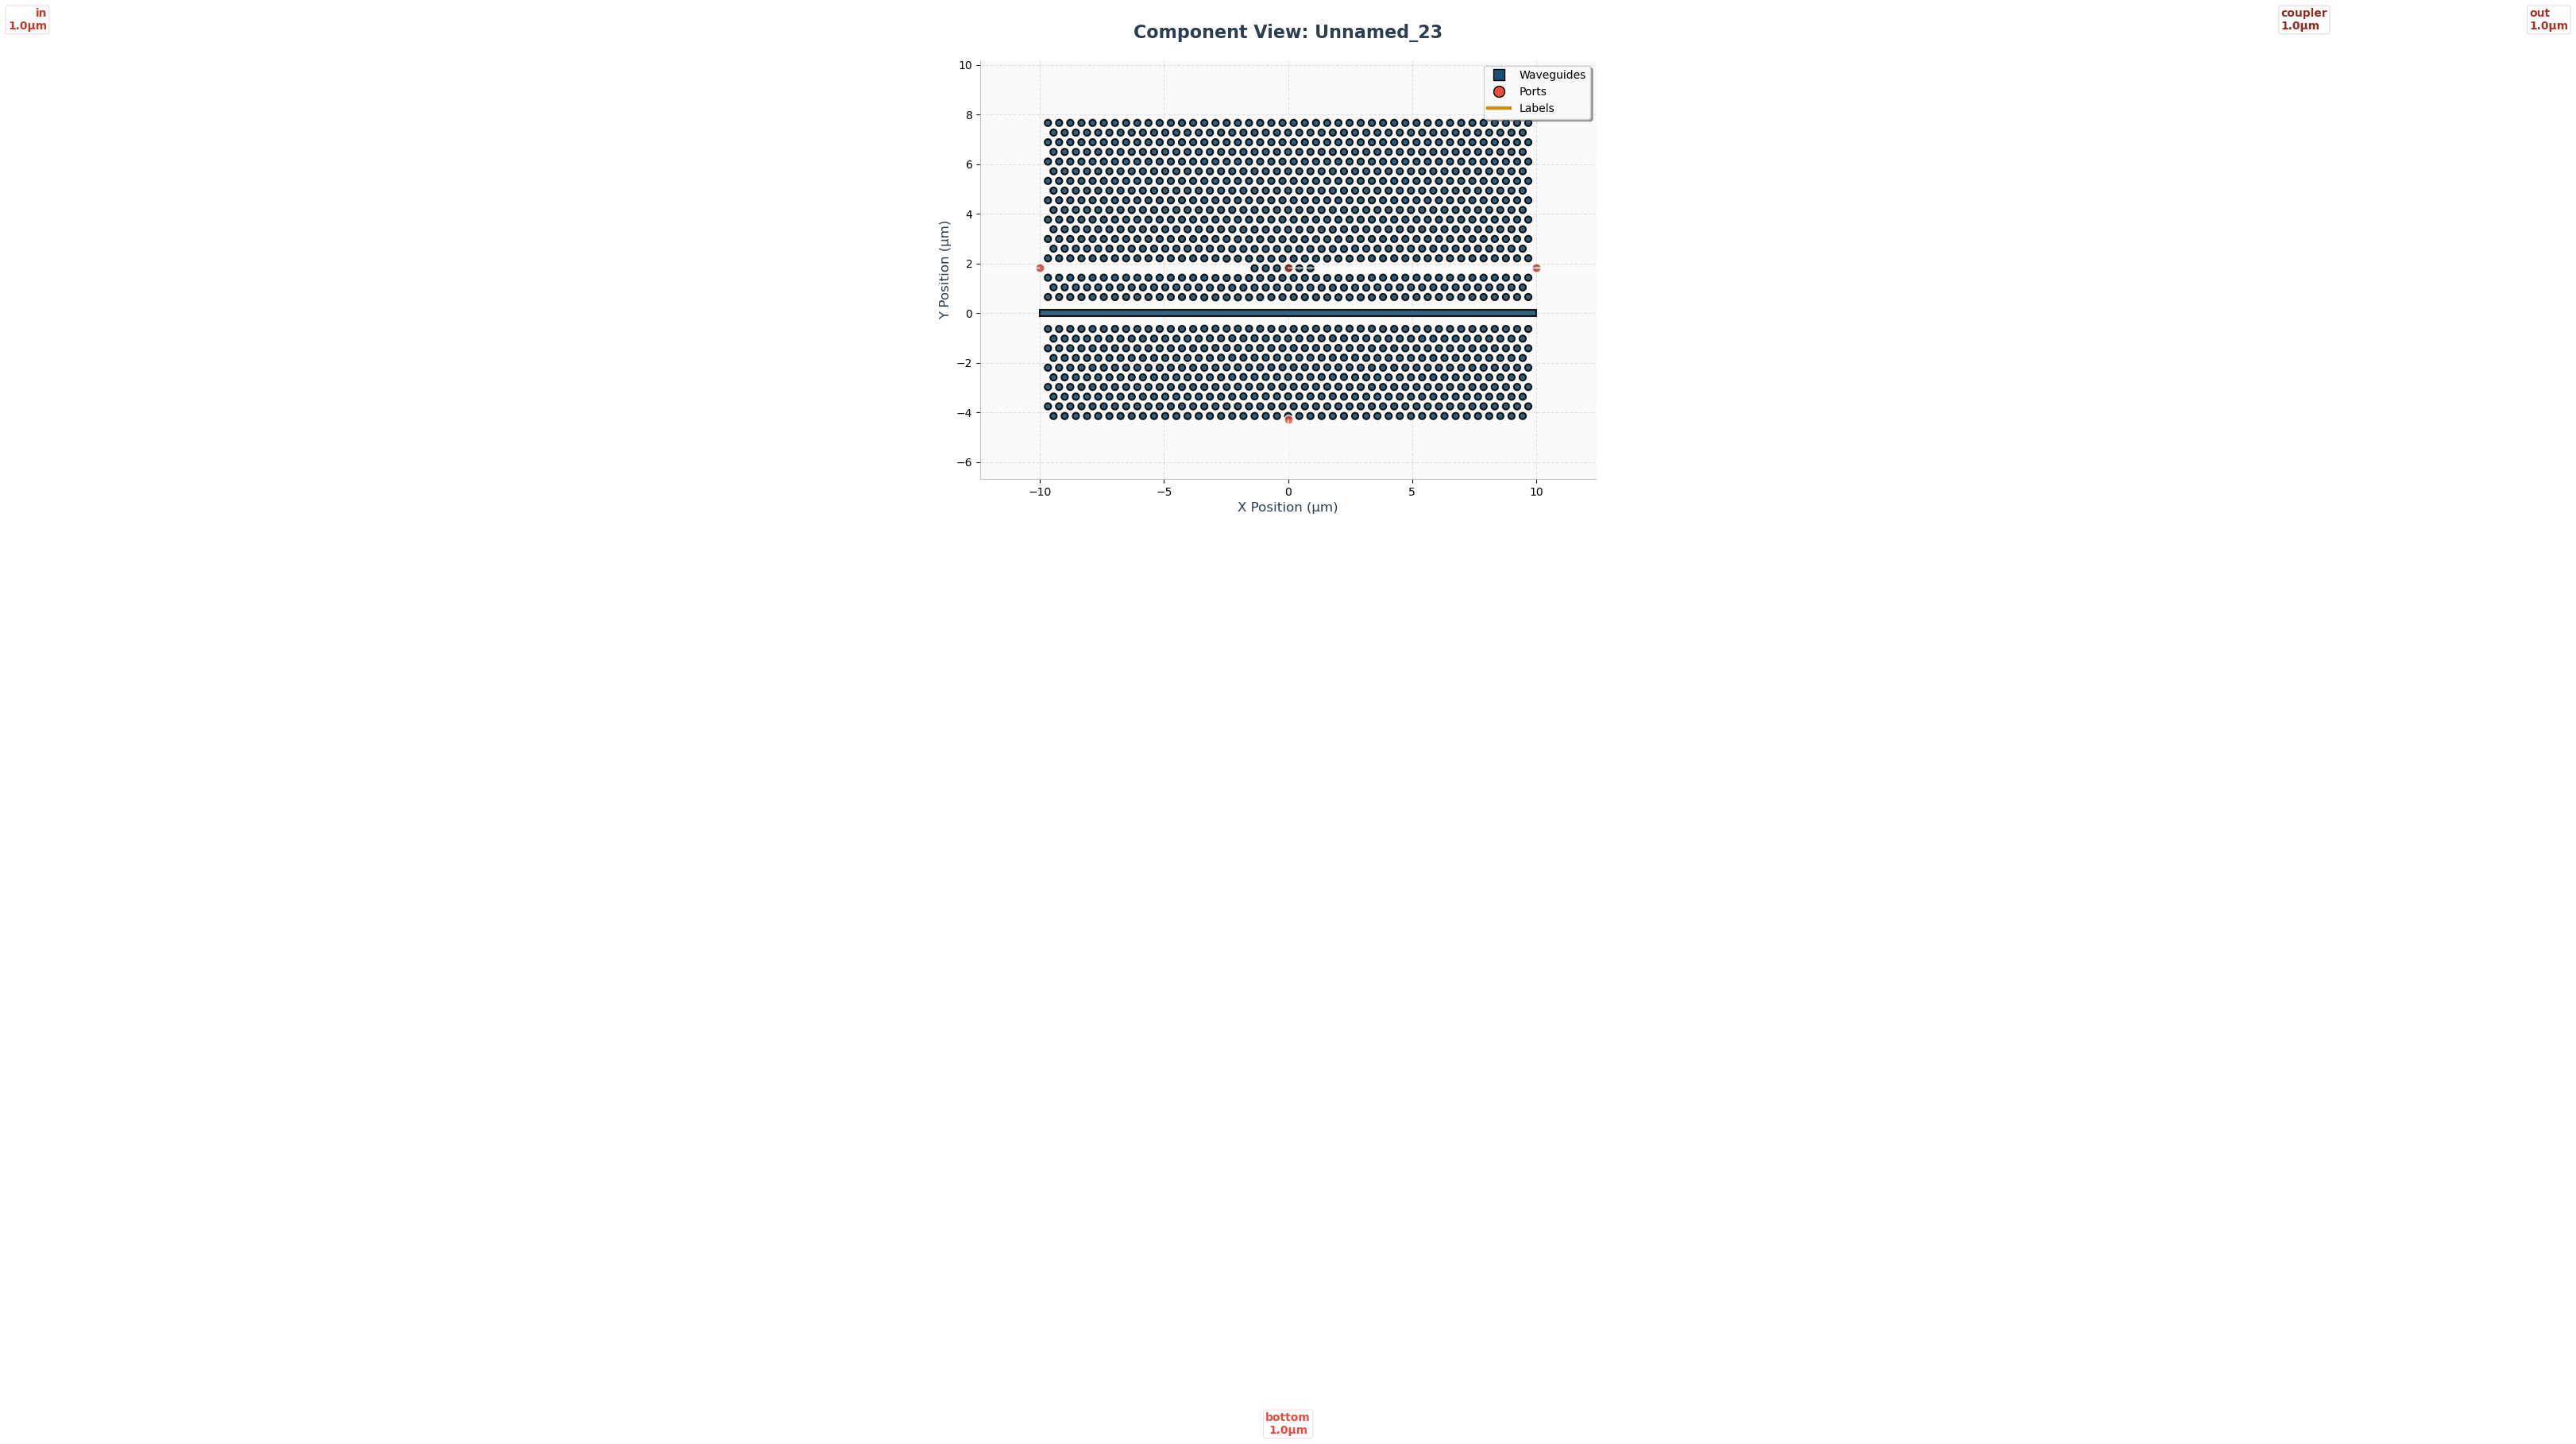

In [3]:
from gdslayout.structure import Structure
from gdslayout.visualization import plot_component

structure = Structure(config_path="./config_example/12.yaml")
device, device_path = structure._load_device()
structure.devices[1].pprint_ports()
fig, ax = plot_component(structure.devices[1], with_ports=True, with_labels=True, figsize=(10, 8))

## Coupler

### Function signature and return types

A Coupler generator **must** return a tuple `(D, P)`:

* **D**: `gf.Component`
  The fully instantiated geometry of the coupling structure, including all ports, tapers, labels and metadata.
* **P**: `gf.Path | Sequence[tuple[float, float]] | gf.Component`
  For *port* couplers, `P` is the centerline optical path. For *regional* couplers, you may return the same `gf.Component` again if no explicit path is required.

### Categories

All couplers expose **`in`** and **`out`** ports; what differs is how their geometry is derived.

| Category         | Required ports | Additional configuration           |
| ---------------- | -------------- | ---------------------------------- |
| Regional coupler | `in`, `out`    | `ring_down`, `center`              |
| Port coupler     | `in`, `out`    | `ring_down`, `etch_info`, `center` |

Do **not** mix categories within the same generator.

### `ring_down`

`ring_down` is a 2‑element list:

```python
ring_down: list = [horizontal_span, vertical_span]
```

* **horizontal\_span (ℓ)** – width of the coupling cluster.
* **vertical\_span (d)** – vertical offset of the cluster relative to the reference Device.

#### Horizontal span codecs

| Code        | Meaning                  | Computation                          |
| ----------- | ------------------------ | ------------------------------------ |
| `r:<ratio>` | Relative to Device width | `ℓ = ring_down_device.xsize * ratio` |

#### Vertical span codecs

| Code         | Meaning                   | Computation                                                   |
| ------------ | ------------------------- | ------------------------------------------------------------- |
| `m`          | Middle                    | `d = -ring_down_device.y`                                     |
| `b`          | Top                       | `d = -ring_down_device.ymin`                                  |
| `t`          | Bottom                    | `d = -ring_down_device.ymax`                                  |
| `b:<offset>` | Top plus offset           | `d = -ring_down_device.ymin - offset`                         |
| `t:<offset>` | Bottom plus offset        | `d = -ring_down_device.ymax - offset`                         |
| `m:<offset>` | Middle plus offset        | `d = -ring_down_device.y - offset` *(positive direction)*     |
| `r:<ratio>`  | Relative to Device height | `d = -ring_down_device.ymax + ring_down_device.ysize * ratio` |

*Aliases*: `t` → `r:0`, `m` → `r:0.5`, `b` → `r:1`.

### `etch_info`

`etch_info` is a 2‑element list `[upper, lower]` that controls how far the etch pocket expands vertically around the coupler region.

| Entry value | Interpretation                      |
| ----------- | ----------------------------------- |
| *float*     | Increment (µm) added beyond core WG |
| `'u'`       | Extend up to Device `.ymax`         |
| `'b'`       | Extend down to Device `.ymin`       |

Examples: `['u', 0.2]`, `[0.15, 'b']`, `['u', 'b']`

### `center`

`center` is a 2‑tuple `(x_c, y_c)` that marks the intended optical‑axis intersection of the coupler **in the coordinate frame of the downstream Device**.
It is computed automatically by the placer when assembling a Coupler + Device hierarchy, so it rarely needs to appear in user‑level YAML.  Override only for atypical layouts or standalone testing.


### Example: Regional coupling coupler

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation        ┃ layer         ┃ center                                       ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 1.0   │ 180.00000597612606 │ SLAB150 (2/0) │ (-85.0, 70.0)                                │ optical   │
│ o2   │ 1.0   │ 359.99999402391035 │ SLAB150 (2/0) │ (184.99999511025848, -6.985140117904409e-06) │ optical   │
│ in   │ 1.0   │ 180.0000059761261  │ SLAB150 (2/0) │ (-85.0, 70.0)                                │ optical   │
│ out  │ 1.0   │ 359.9999940239102  │ SLAB150 (2/0) │ (184.99999511025848, -6.985140117876654e-06) │ optical   │
└──────┴───────┴────────────────────┴───────────────┴──────────────────────────────────────────────┴───────────┘

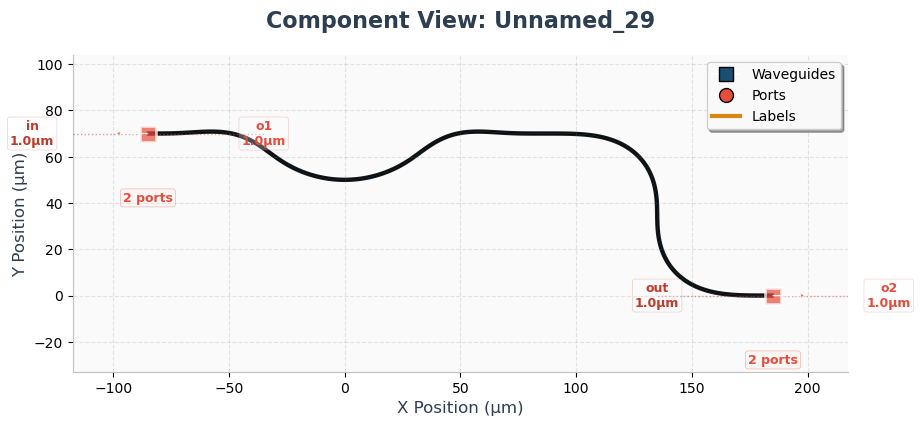

In [4]:
from gdslayout.structure import Structure
from gdslayout.visualization import plot_component

structure = Structure(config_path="./config_example/6.yaml")
structure.config['coupler']['ring_down'] = [100, 0]
coupler, coupler_path = structure._load_coupler()
coupler.pprint_ports()
fig, ax = plot_component(coupler, with_ports=True, with_labels=True, figsize=(10, 8))

### Example: Port coupling coupler

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer         ┃ center                                      ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ in   │ 1.0   │ 180.0       │ SLAB150 (2/0) │ (0.0, 50.0)                                 │ optical   │
│ out  │ 0.518 │ 0.0         │ SLAB150 (2/0) │ (120.00026846658972, 0.0005369101010899158) │ optical   │
└──────┴───────┴─────────────┴───────────────┴─────────────────────────────────────────────┴───────────┘

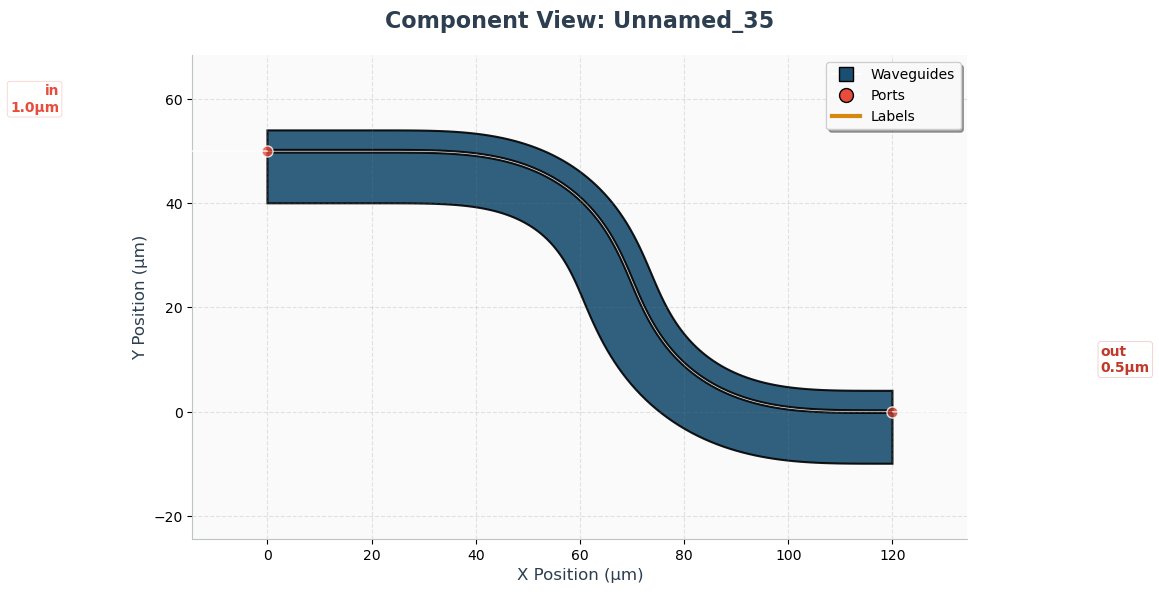

In [5]:
from gdslayout.structure import Structure
from gdslayout.visualization import plot_component

structure = Structure(config_path="./config_example/12.yaml")
structure.config['coupler'][1]['ring_down'] = [100, 0]
structure.config['coupler'][0]['etch_info'] = [4, 10]
structure.config['coupler'][1]['etch_info'] = [4, 10]
coupler, coupler_path = structure._load_coupler()
coupler[1].pprint_ports()
fig, ax = plot_component(coupler[1], with_ports=True, with_labels=True, figsize=(10, 8))

## Structure

A Structure generator assembles one or more `Device` components, potentially with `Coupler` components, into a cohesive, interconnected circuit. It reads a YAML configuration file to define the components, their parameters, and the routing rules between them.

### Function signature and return type

Unlike `Device` and `Coupler` generators, a `Structure` generator **must** return a single `gf.Component`:

* **C**: `gf.Component`
  The fully instantiated geometry of the combined structure, including all newly created top-level ports. The child components (`Device` and `Coupler` instances) are placed as references within this top-level component.

```
def Structure(**kwargs) -> gf.Component:
    # Logic to parse YAML, place devices, and route connections
    ...

```

The design rule is implemented in the `structure.py` script.

### Configuration

A `Structure` is defined by the components it contains and the rules for connecting them. This is typically specified through keyword arguments passed to the generator.

| Parameter | Type | Description | 
 | ----- | ----- | ----- | 
| `devices` | `list[gf.Component]` | An ordered list of the `Device` components to be assembled. | 
| `coupler` | `list[gf.Component]` | An ordered list of the `Coupler` components to be assembled. |
| `device_connections` | `list[dict]` | A list of rules that define the routing between the ports of the components in the `devices` list. | 
| `coupler_attach_device_id` | `int` | The index of the device in the `devices` list to which the `Coupler` should be attached. | 
| `gap` | `float` | The minimum gap between routing waveguides. | 
| `layer` | `tuple[int, int]` | The GDS layer for the routing waveguides. | 

#### Device Connections

The `device_connections` parameter defines connection between devices. Each entry in the list is a dictionary specifying the source and destination ports. The code uses these definitions to create waveguide connections.

**Example:**
This connects the `top` port of the first device to the `bottom` port of the second device.

```
device_connections:
  - from: device[0].ports['top']
    to: device[1].ports['bottom']

```

#### Coupler Attachment

If a `Coupler` is part of the `Structure`, `coupler_attach_device_id` specifies which `Device` it connects to. The code will typically connect the `Coupler`'s `out` port to the `Device`'s `in` port.

**Example:**
This specifies that the `Coupler` should be attached to the second device in the `devices` list (`device[1]`).

```
coupler_attach_device_id: 1

```

### Mandatory Ports

A final `Structure` component **must expose the following ports** to ensure it can be integrated into a higher-level design. The internal ports of the child devices used for connections are consumed and typically not exposed at the top level.

| Port Name | Purpose | Orientation Convention | 
 | ----- | ----- | ----- | 
| `in` | The primary optical input for the entire structure. | Faces −x (180 °) | 
| `out` | The primary optical output for the entire structure. | Faces +x (0 °) | 
| `device_center` | A placement port at the geometric center of the primary device array. | Electrical type, orientation ignored. | 

### Port Management

The `Structure` generator is responsible for managing the ports of the final component.

* **Consumed Ports:** Ports from child devices that are used in `device_connections` are considered "consumed" and are not exposed at the `Structure` level.

* **Exposed Ports:** The mandatory `in`, `out`, and `device_center` ports are created and exposed.

### Example: Regional coupling

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation       ┃ layer         ┃ center                                  ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0               │ SLAB150 (2/0) │ (88.98898898898898, 60.5)               │ optical   │
│ in            │ 1.0   │ 180.0000059761261 │ SLAB150 (2/0) │ (3.9889889889889787, 82.0)              │ optical   │
│ out           │ 1.0   │ 359.9999940239101 │ SLAB150 (2/0) │ (352.69108504003066,                    │ optical   │
│               │       │                   │               │ -1.7323124666290823e-05)                │           │
│ device_center │ 1.0   │ 0.0               │ SLAB150 (2/0) │ (0.0, 0.0)                              │ optical   │
└───────────────┴───────┴───────────────────┴───────────────┴─────────────────────────────────────────┴───────────┘

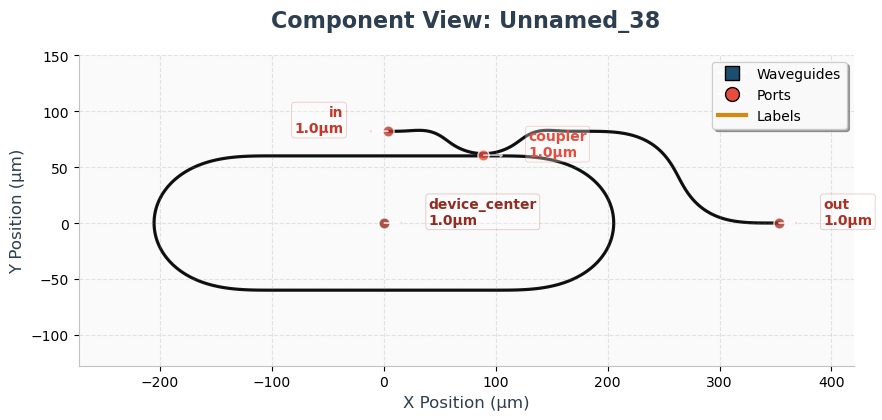

In [6]:
from gdslayout.structure import Structure

structure = Structure(config_path="./config_example/6.yaml")
component = structure.build()
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))

### Example: Port coupling

┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name          ┃ width ┃ orientation ┃ layer         ┃ center                                   ┃ port_type ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ coupler       │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 16.392304845413264)                │ optical   │
│ in            │ 4.928 │ 180.0       │ SLAB150 (2/0) │ (-58.889, 16.392304845413264)            │ optical   │
│ out           │ 4.928 │ 0.0         │ SLAB150 (2/0) │ (185.00009331211476, -20.85568685312758) │ optical   │
│ device_center │ 1.0   │ 0.0         │ SLAB150 (2/0) │ (0.0, 15.588999999999999)                │ optical   │
└───────────────┴───────┴─────────────┴───────────────┴──────────────────────────────────────────┴───────────┘

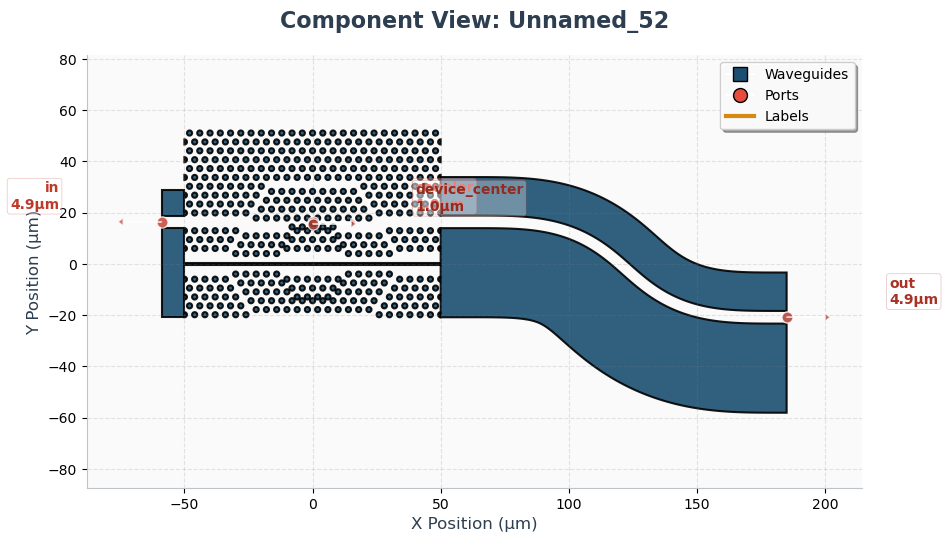

In [7]:
from gdslayout.structure import Structure

structure = Structure(config_path="./config_example/11.yaml")
component = structure.build()
component.pprint_ports()
fig, ax = plot_component(component, with_ports=True, with_labels=True, figsize=(10, 8))